In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv("C:\\Users\\thiru\\OneDrive\\Documents\\Guvi asignment_task_8\\car_data.csv")

In [6]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Tasks, Part 1

1.Find the linear regression equation for mileage vs price.
3.Chart the original data and the equation on the chart.
2.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)



In [8]:
x = df[['Mileage']]
y = df[['Price']]

In [9]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)
print('r-squared:', linreg.score(x, y))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
r-squared: 0.02046344732348926


Text(0.5, 1.0, 'Mileage vs Price')

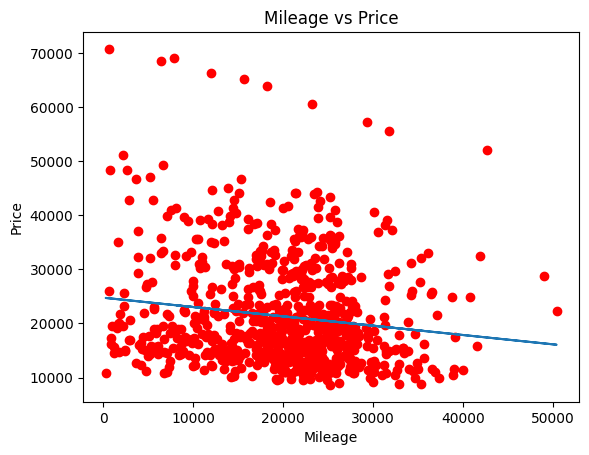

In [10]:
plt.scatter(x, y, color='r')
plt.plot(x, linreg.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, 

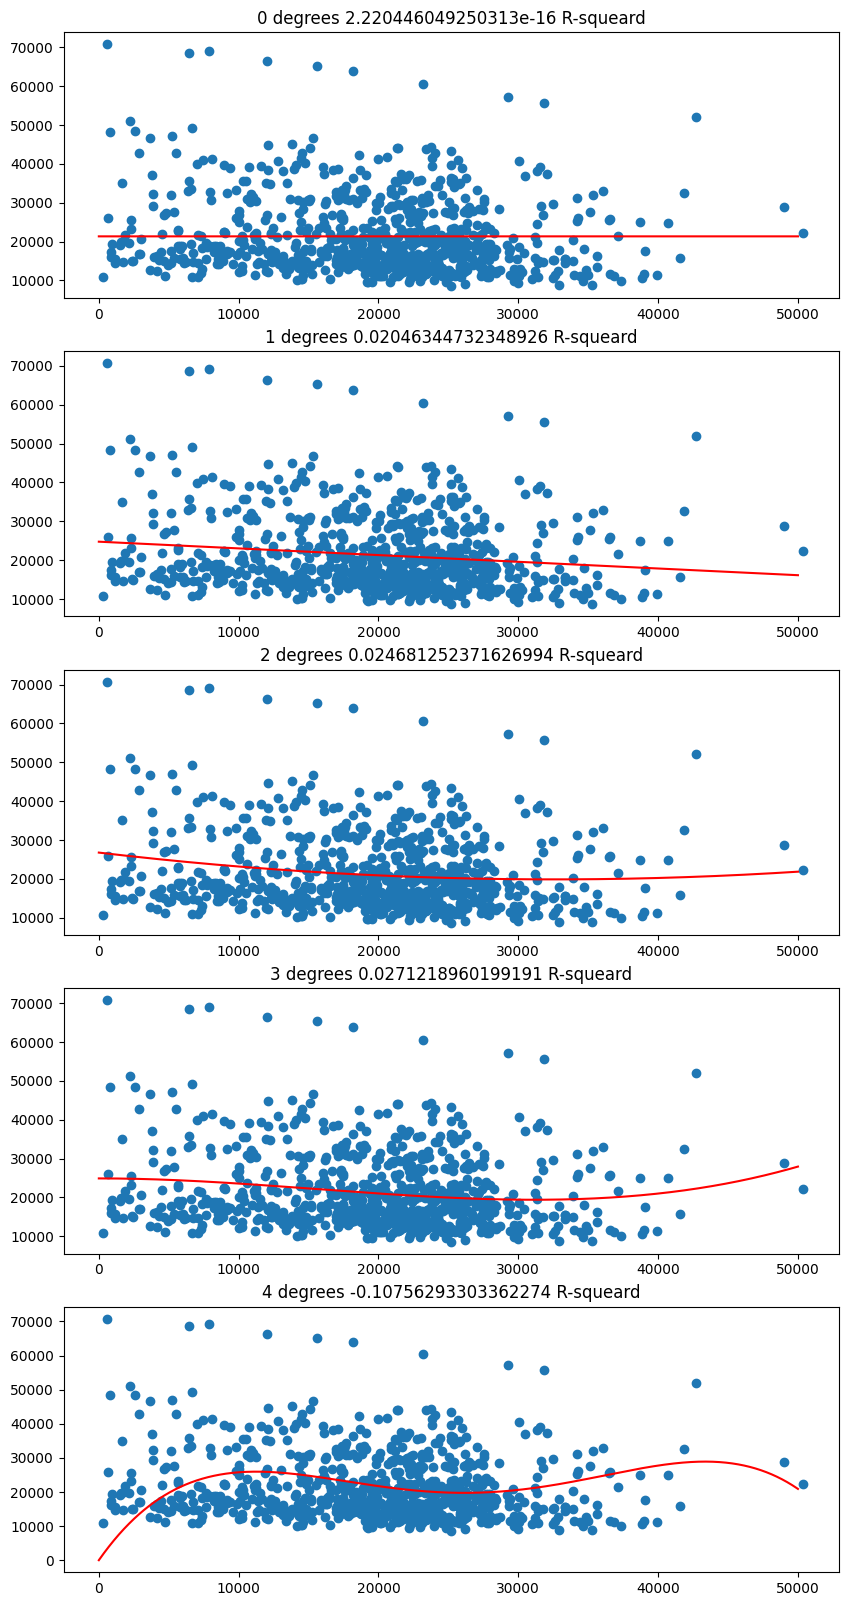

In [14]:
degrees = 5
fig, axs = plt.subplots(degrees, figsize = (10,20))
                        
for degree in range(degrees):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', linear_model.LinearRegression(fit_intercept=False))])

    points = 50000


    model = model.fit(x, y)
    model_score = model.score(x,y)

    subplot = axs[degree]
    subplot.plot(model.predict([[j] for j in range(points)]), color='r')
    subplot.scatter(x, y)
    subplot.set_title('{} degrees {} R-squeard'.format(degree, model_score))

plt.show()

# Tasks, Part 2

1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3.Find the combination of the factors that is the best predictor for price.

In [16]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[feature]
y = df[['Price']]

In [17]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


### R-squared

In [18]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.446264353672838
